<a href="https://colab.research.google.com/github/lonespear/MA206/blob/main/grant_tommy_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [22]:
set.seed(42)
df <- read_csv("babies.csv") %>% filter(mht < 90 & babyweight < 7500 & weeks < 50 & weeks > 20) %>% sample_n(size=5000)

Rows: 100000 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (24): placetype, mothersbirthplace, mothersrace, mothershispanic, marita...
dbl (14): yearmonth, mothersage, fathersage, birthnumber, care, numvisit, mh...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [23]:
df %>% colnames

[1] "yearmonth"         "placetype"         "mothersage"       
 [4] "mothersbirthplace" "mothersrace"       "mothershispanic"  
 [7] "maritalstatus"     "mothersEDU"        "fathersage"       
[10] "fatherhispanic"    "birthnumber"       "monthsprev"       
[13] "care"              "numvisit"          "WIC"              
[16] "mht"               "mwt"               "diabetes"         
[19] "STDs"              "induced"           "plurality"        
[22] "sexofinfant"       "weeks"             "babyweight"       
[25] "NICU"              "fathersrace"       "fathersEDU"       
[28] "smoke"             "BMI"               "gestD"            
[31] "preterm"           "infertility"       "fertdrugs"        
[34] "tech"              "cesarean"          "numcesarean"      
[37] "augmented"         "babyID"

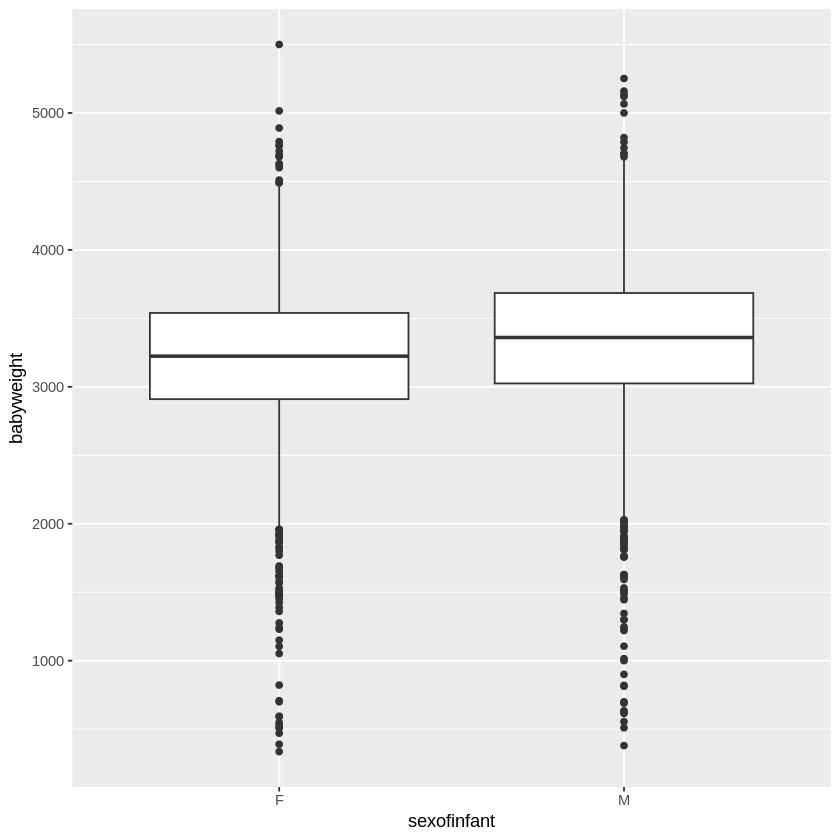

In [41]:
df %>% ggplot(aes(x=sexofinfant ,y=babyweight)) + geom_boxplot()

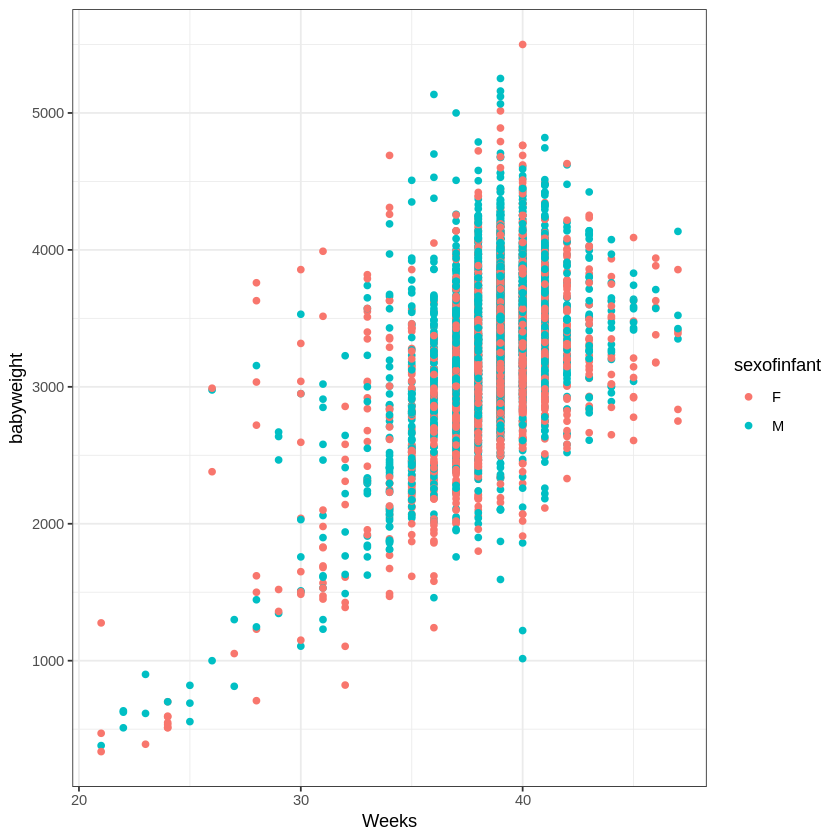

In [40]:
df %>% ggplot(aes(x=weeks, y=babyweight, color=sexofinfant)) + geom_point() + theme_bw() +
  labs(x="Weeks")

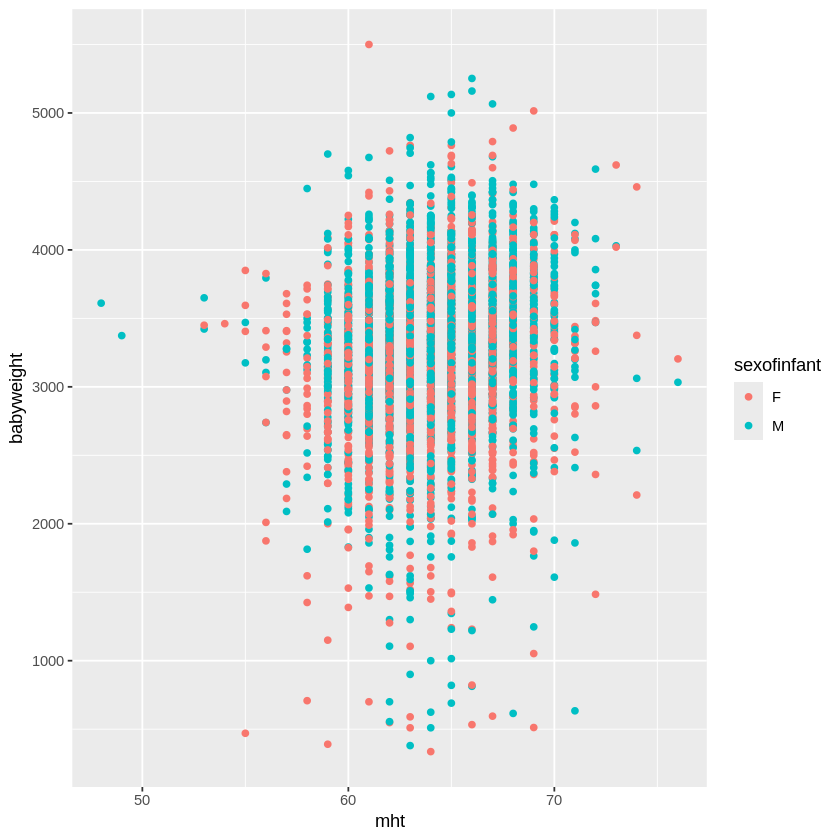

In [26]:
df %>% ggplot(aes(x=mht, y=babyweight, color=sexofinfant)) + geom_point()

$$
\widehat{BabyWeight} = \beta_0 + \beta_1 MotherHeight + \beta_2 GestationTime + \beta_3 InfantSex
$$

In [27]:
model1 <- lm(babyweight ~ mht, data=df)
summary(model1)


Call:
lm(formula = babyweight ~ mht, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2925.4  -298.5    31.9   351.3  2330.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1298.08     177.57    7.31 3.09e-13 ***
mht            30.68       2.77   11.07  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 554.1 on 4998 degrees of freedom
Multiple R-squared:  0.02395,	Adjusted R-squared:  0.02375 
F-statistic: 122.6 on 1 and 4998 DF,  p-value: < 2.2e-16


In [28]:
model2 <- lm(babyweight ~ mht + weeks, data=df)
summary(model2)


Call:
lm(formula = babyweight ~ mht + weeks, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2441.28  -300.04    -5.85   298.67  2155.99 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3125.501    184.491  -16.94   <2e-16 ***
mht            28.069      2.376   11.81   <2e-16 ***
weeks         118.933      2.802   42.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 475.1 on 4997 degrees of freedom
Multiple R-squared:  0.2826,	Adjusted R-squared:  0.2824 
F-statistic: 984.5 on 2 and 4997 DF,  p-value: < 2.2e-16


In [29]:
model3 <- lm(babyweight ~ mht + weeks + sexofinfant, data=df)
summary(model3)


Call:
lm(formula = babyweight ~ mht + weeks + sexofinfant, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2505.15  -295.68    -3.36   291.41  2219.82 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3163.508    182.811 -17.305   <2e-16 ***
mht             27.440      2.355  11.653   <2e-16 ***
weeks          119.247      2.776  42.961   <2e-16 ***
sexofinfantM   130.215     13.319   9.776   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 470.6 on 4996 degrees of freedom
Multiple R-squared:  0.2961,	Adjusted R-squared:  0.2957 
F-statistic: 700.6 on 3 and 4996 DF,  p-value: < 2.2e-16


In [30]:
model4 <- lm(babyweight ~ mht + weeks*sexofinfant, data=df)
summary(model4)


Call:
lm(formula = babyweight ~ mht + weeks * sexofinfant, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2514.66  -295.30    -5.66   290.10  2229.04 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2919.306    210.013 -13.901   <2e-16 ***
mht                   27.541      2.354  11.699   <2e-16 ***
weeks                112.757      3.907  28.858   <2e-16 ***
sexofinfantM        -374.981    214.570  -1.748   0.0806 .  
weeks:sexofinfantM    13.088      5.548   2.359   0.0184 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 470.4 on 4995 degrees of freedom
Multiple R-squared:  0.2969,	Adjusted R-squared:  0.2963 
F-statistic: 527.3 on 4 and 4995 DF,  p-value: < 2.2e-16


In [31]:
model5 <- lm(babyweight ~ mht*sexofinfant + weeks, data=df)
summary(model5)


Call:
lm(formula = babyweight ~ mht * sexofinfant + weeks, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2506.67  -296.98    -3.31   292.25  2214.48 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -3050.775    239.720 -12.726  < 2e-16 ***
mht                 25.653      3.403   7.537 5.66e-14 ***
sexofinfantM       -89.192    302.075  -0.295    0.768    
weeks              119.286      2.776  42.965  < 2e-16 ***
mht:sexofinfantM     3.427      4.713   0.727    0.467    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 470.7 on 4995 degrees of freedom
Multiple R-squared:  0.2962,	Adjusted R-squared:  0.2956 
F-statistic: 525.5 on 4 and 4995 DF,  p-value: < 2.2e-16


In [32]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [36]:
# Load the stargazer package
library(stargazer)

# Display regression results for model1 through model5
stargazer(model1, model2, model3, model4, model5,
          type = "text",  # Use "html" or "latex" for other output formats
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
          dep.var.caption = "Response: Baby Weight (g)",
          dep.var.labels.include = FALSE,
          no.space = TRUE,
          align = TRUE,
          digits = 3)


Regression Results
                                                                        Response: Baby Weight (g)                                                    
                    ---------------------------------------------------------------------------------------------------------------------------------
                             Model 1                   Model 2                   Model 3                   Model 4                   Model 5         
                               (1)                       (2)                       (3)                       (4)                       (5)           
-----------------------------------------------------------------------------------------------------------------------------------------------------
mht                         30.678***                 28.069***                 27.440***                 27.541***                 25.653***        
                             (2.770)                   (2.376)                  

In [37]:
# Load the stargazer package
library(stargazer)

# Display regression results for model1 through model5
stargazer(model1, model2, model3, model4, model5,
          type = "latex",  # Use "html" or "latex" for other output formats
          title = "Regression Results",
          column.labels = c("Model 1", "Model 2", "Model 3", "Model 4", "Model 5"),
          dep.var.caption = "Response: Baby Weight (g)",
          dep.var.labels.include = FALSE,
          no.space = TRUE,
          align = TRUE,
          digits = 3)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Mon, Apr 07, 2025 - 01:34:59 PM
% Requires LaTeX packages: dcolumn 
\begin{table}[!htbp] \centering 
  \caption{Regression Results} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lD{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} D{.}{.}{-3} } 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{5}{c}{Response: Baby Weight (g)} \\ 
\cline{2-6} 
 & \multicolumn{1}{c}{Model 1} & \multicolumn{1}{c}{Model 2} & \multicolumn{1}{c}{Model 3} & \multicolumn{1}{c}{Model 4} & \multicolumn{1}{c}{Model 5} \\ 
\\[-1.8ex] & \multicolumn{1}{c}{(1)} & \multicolumn{1}{c}{(2)} & \multicolumn{1}{c}{(3)} & \multicolumn{1}{c}{(4)} & \multicolumn{1}{c}{(5)}\\ 
\hline \\[-1.8ex] 
 mht & 30.678^{***} & 28.069^{***} & 27.440^{***} & 27.541^{***} & 25.653^{***} \\ 
  & (2.770) & (2.376) & (2.355) & (2.354) & (3.403) \\ 
  weeks &  & 118.933^{***} & 119.247^{***} & 112.757^{***} & 11